
### На входе у нас будет набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные (позитивные и негативные).

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
# Напишите Ваш код в этой ячейке
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('..\\DATA\\moviereviews.csv')

In [3]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


**Задание: Проверьте, есть ли какие-либо отсутствующие значения в этих данных.**

In [8]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


**Задание: Удалите отзывы о фильмах, текст которых принимает значение NaN**

In [10]:
df = df.dropna()

**Проверим, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов. Как это можно проверить? Это можно сделать разными способами.**

In [11]:
len(df[df['review'].str.isspace()])

27

In [32]:
df = df.drop(index=df[df['review'].str.isspace()].index, axis=0)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          1938 non-null   object
 1   review         1938 non-null   object
 2   len_of_review  1938 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 60.6+ KB


**Посчитаем количество строк для различных значений колонки label:**

In [36]:
df.label.value_counts()

neg    969
pos    969
Name: label, dtype: int64

## Исследование данных (EDA) для мешка слов (bag of words)


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer(stop_words='english')

In [13]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# Сортируем от больших к меньшим
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [14]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# Сортируем от больших к меньшим
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Данные и обучение модели

**Разделим данные на признаки X и целевую переменную y, а также выполним разбиение на обучающий и тестовый наборы данных (train/test split).**

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.review
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Обучение модели

**Создадим пайплайн, в котором создадим вектора TF-IDF из сырых текстовых даных, а затем обучим модель машинного обучения. После создания пайплайна выполним его обучение на обучающем наборе данных.**

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix

In [71]:
pipe = Pipeline([('tfidf' , TfidfVectorizer()),('svc', SVC())])

In [72]:
def report(model):
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    print(classification_report(y_test, preds))
    plot_confusion_matrix(pipe,X_test, y_test)
    

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

**Выведем на экран отчёт "classification report" и матрицу ошибок для результатов работы пайплайна на тестовых данных.**

In [74]:
model = SVC()

              precision    recall  f1-score   support

         neg       0.81      0.85      0.83       191
         pos       0.85      0.80      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



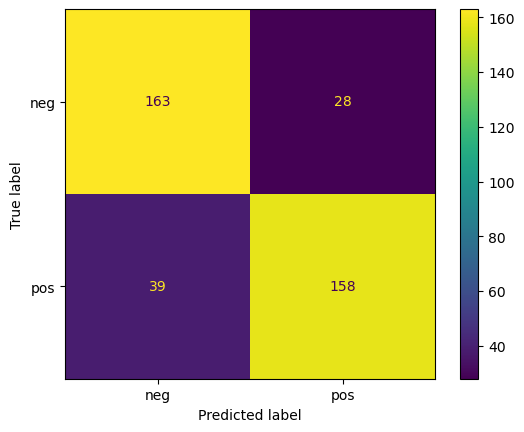

In [75]:
report(model)